# Приоритизация гипотез и анализ A/B-теста для увеличения выручки интернет-магазина

# Описание проекта  

В крупном интернет-магазине я вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  

**Часть 1. Приоритизация гипотез.**  
Задача:
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
3. Проследить как изменилась приоритизация гипотез при применении RICE вместо ICE.  

**Часть 2. Анализ A/B-теста.**  
Задача проанализировать A/B-тест:  
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.  
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.  
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.  
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.  
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.  
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.  
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.  
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.  
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.  
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.  
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.  
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.  
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.  
14. Принять решение по результатам теста и аргументировать его. Варианты решений:  
    - Остановить тест, зафиксировать победу одной из групп.
    - Остановить тест, зафиксировать отсутствие различий между группами.
    - Продолжить тест.  

**Описание данных**  
Структура `hypothesis.csv`:  
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Структура `orders.csv`:  
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.  

Структура `visitors.csv`:  
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

**План исследования**:
1. Загрузка данных и подготовка их к анализу.  
2. Приоритизация гипотез.  
3. Анализ A/B-теста.  
4. Вывод.

## Загрузка данных и подготовка их к анализу.

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Указываем пути к файлам
try:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # визиты
    )
except:
    hypothesis, orders, visitors = (
    pd.read_csv('C:/Users/User/Desktop/hypothesis.csv'),  # гипотезы
    pd.read_csv('C:/Users/User/Desktop/orders.csv'),  # заказы
    pd.read_csv('C:/Users/User/Desktop/visitors.csv'),  # визиты
    )

In [3]:
display(hypothesis.head())
print('-'*72)
display(orders.head())
print('-'*72)
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


------------------------------------------------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


------------------------------------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
# Приводим названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
print(f'Количество пропусков в hypothesis: \n{hypothesis.isna().sum()}')
print('-'*30)
print(f'Количество пропусков в orders: \n{orders.isna().sum()}')
print('-'*30)
print(f'Количество пропусков в visitors: \n{visitors.isna().sum()}')

Количество пропусков в hypothesis: 
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
------------------------------
Количество пропусков в orders: 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
------------------------------
Количество пропусков в visitors: 
date        0
group       0
visitors    0
dtype: int64


In [6]:
print(f'Количество дубликатов в hypothesis: {hypothesis.duplicated().sum()}')
print('-'*40)
print(f'Количество дубликатов в orders: {orders.duplicated().sum()}')
print('-'*40)
print(f'Количество дубликатов в visitors: {visitors.duplicated().sum()}')

Количество дубликатов в hypothesis: 0
----------------------------------------
Количество дубликатов в orders: 0
----------------------------------------
Количество дубликатов в visitors: 0


In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
# Проверяем результаты
print(hypothesis.info())
print('-'*50)
print(orders.info())
print('-'*50)
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)

### Промежуточный вывод

Данные загрузили.  
По итогу мы видим, что пропусков и дубликатов нет. Названия столбцов в `hypothesis` привели к нижнему регистру. Столбцы с датой преобразовали в необходимый формат.

## Приоритизация гипотез.

### Применение фреймворка ICE

ICE — один из самых популярных способов приоритизации задач.  
ICE = (Impact * Confidence) / Efforts  
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
Efforts — сколько стоит протестировать эту гипотезу.

In [9]:
pd.set_option('max_colwidth', 200)
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применение фреймворка RICE

RICE — состоит из четырёх компонентов.  
RICE = (Reach * Impact * Confidence) / Efforts  
Добавляется еще Reach — скольких пользователей затронет изменение, которое вы хотите внести.

In [10]:
pd.set_option('max_colwidth', 200)
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])
                           / hypothesis['efforts'], 2)
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Промежуточный вывод
В ICE мы видим, что лидирует 8 гипотеза, далее идут 0 и 7.  
В связи с тем, что RICE учитывает количество пользователей, которых затрагивает изменение, у нас изменилась приоритизация.  
В RICE с большим отрывом лидирует 7 гипотеза, далее идут 2 и 0.  
Лидирующая в ICE 8 гипотеза имеет оценку 1 в Reach, поэтому она опустилась на 5 место, а 7 гипотеза заняла 1 место с оценкой 10. Мы видим, что добавление формы подписки затронет большинство пользователей, в отличие от запуска акции к дню рождения.  
Для нас приоритетными гипотезами будут 7, 2 и 0.

## Анализ A/B-теста.

### Предподготовка к анализу A/B-теста

In [11]:
#Для начала проверим есть ли пользователи, которые вошли в обе группы А и В
groupA = orders[orders['group'] == 'A']['visitorId']
groupB = orders[orders['group'] == 'B']['visitorId']
ordersAB = orders.query('visitorId in @groupA and visitorId in @groupB')
ordersAB['visitorId'].nunique()

58

In [12]:
print(f'Количество уникальных пользователей в группе А составляет', groupA.nunique())
print(f'Количество уникальных пользователей в группе B составляет', groupB.nunique())

Количество уникальных пользователей в группе А составляет 503
Количество уникальных пользователей в группе B составляет 586


In [13]:
#Перезапишем orders
orders = orders.query('visitorId not in @ordersAB["visitorId"]')

In [14]:
#Проверим результат
display(orders.info())
print('-'*72)
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


None

------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Очистили таблицу от 58 пользователей, которые состоят в двух группах, для корректного A/B-теста.

### Построение графика кумулятивной выручки по группам.

In [15]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
# Получим кумулятивные показатели orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head(6)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850


In [17]:
# Получим кумулятивные показатели visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


In [18]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


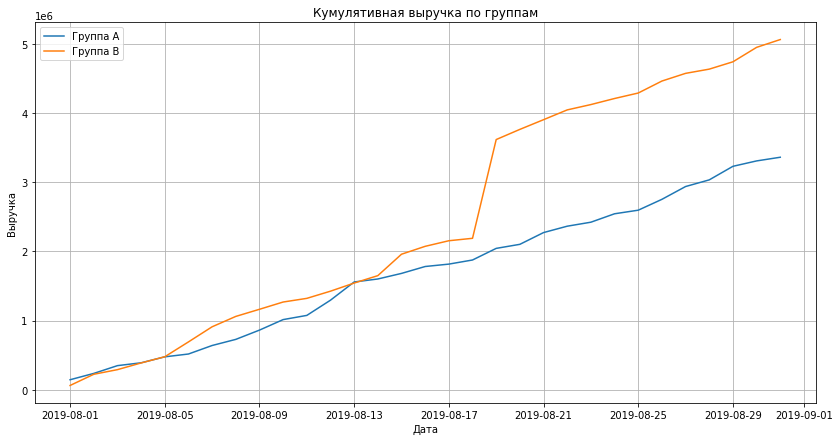

In [19]:
# Размеры графика 
plt.figure(figsize=(14,7))  

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по группам');

Выручка группы B находится выше во все даты кроме первых чисел.  
Также выручка в обеих группах увеличивается на протяжении всего теста.  
С 18 августа видим резкий всплеск по выручке у группы B, возможно увеличилось количество заказов, либо увеличился средний чек.

### Построение графика кумулятивного среднего чека по группам.

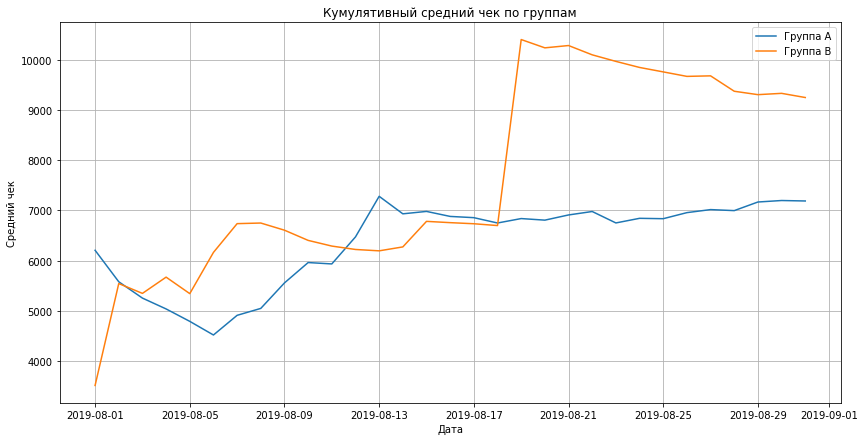

In [20]:
# Размеры графика 
plt.figure(figsize=(14,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по группам');

На этом гафике мы также видим, что 18 августа был резкий скачок роста среднего чека в группе В, возможно, туда попали крупные заказы.  
Группа А имеет более плавный график. К концу тестирования значения стабилизируются.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

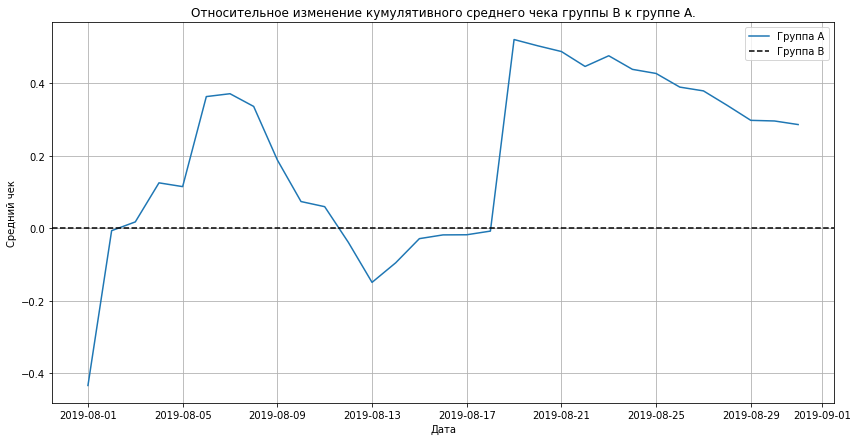

In [21]:
# Размеры графика 
plt.figure(figsize=(14,7))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                          left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A.');

В некоторых точках график сильно скачет. В них должны быть крупные заказы.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

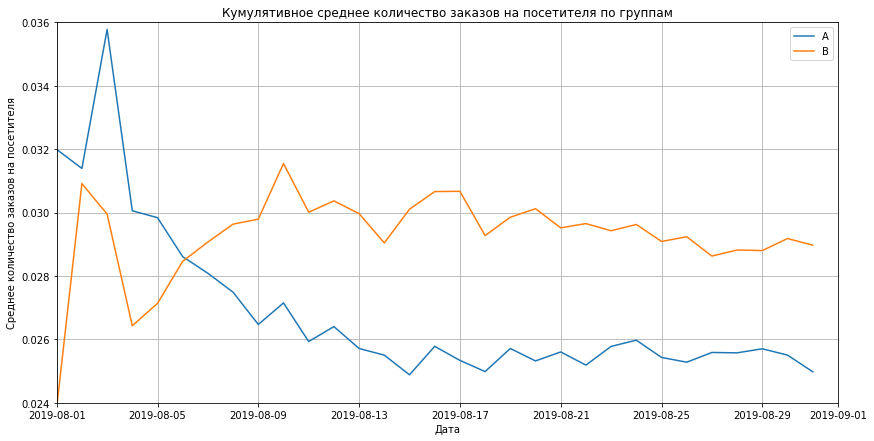

In [22]:
# Размеры графика 
plt.figure(figsize=(14,7))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.024, 0.036])

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()

Группа В, начиная с 6 августа, показывает лучшую конверсию, чем группа А.  
С 9 августа конверсия в двух группах стабилизировалась.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

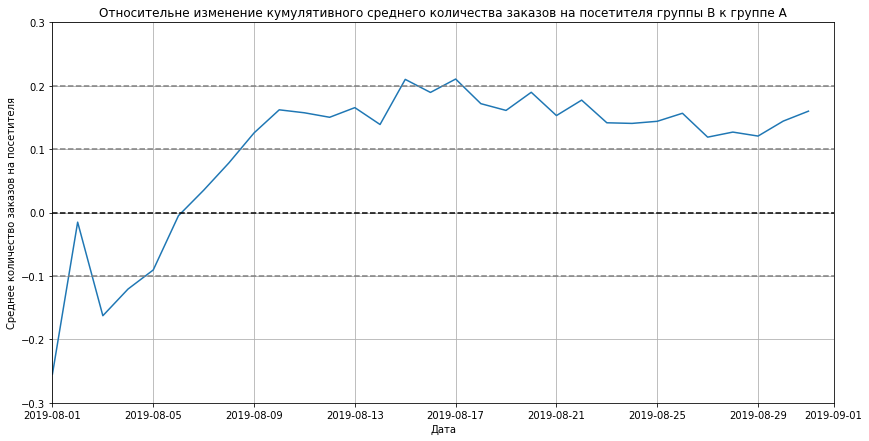

In [23]:
# Размеры графика 
plt.figure(figsize=(14,7))

mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                     left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label='Относительный прирост конверсии группы B относительно группы A')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])

plt.title('Относительне изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()

Начиная с 6 августа кумулятивное среднее количество заказов группы В превосходит группу А в среднем на 15%.

### Построение точечного графика количества заказов по пользователям.

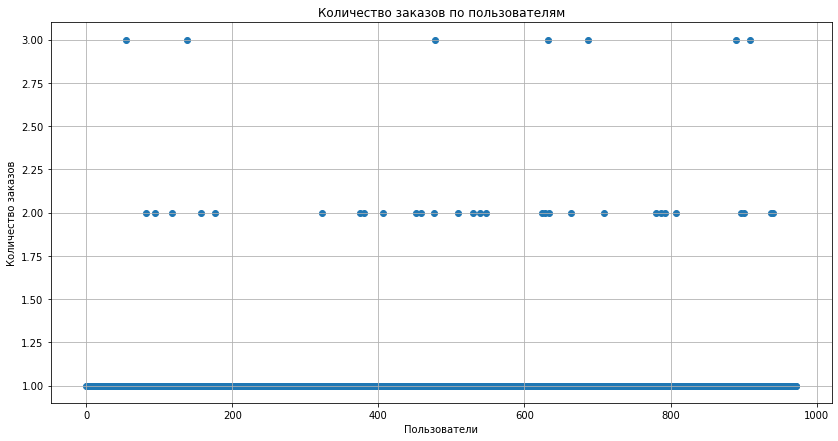

In [24]:
plt.figure(figsize=(14,7))

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactionId']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])

plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.grid()

Большая доля пользователей с 1 заказом. Необходимо посчитать перцентили для выявления аномалий.

### Расчёт 95-го и 99-го перцентиля количества заказов на пользователя.

In [25]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99])) 

[1. 2.]


Не более 5% пользователей совершали больше 1 заказа. И не более 1% пользователей — больше 2 заказов.  
Выберем 1 заказ на одного пользователя за верхнюю границу, остальное будем считать аномалией.

### Построение точечного графика стоимостей заказов.

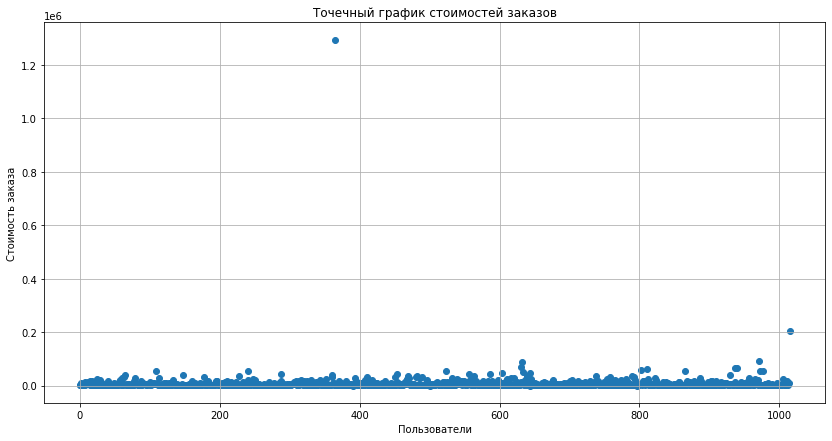

In [26]:
plt.figure(figsize=(14,7))

x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.grid()

На графике видим 2 выделяющихся значения примерно в 1.3 млн и 200 тыс.  
Построим график с лимитом в 100 тыс.

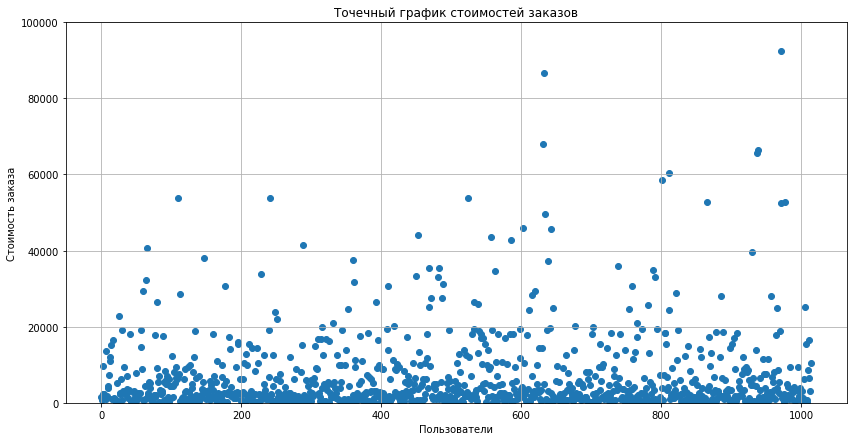

In [27]:
plt.figure(figsize=(14,7))

x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 100000)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.grid()

На этом графике видим, что стоимость основной части заказов лежит в районе 10-50 тыс.

### Расчёт 95-го и 99-го перцентиля стоимости заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов стоимостью более 26785. И не более 1% заказов стоимостью более 53904.  
Выберем стоимость заказа в 26785 за верхнюю границу, остальное будем считать аномалией.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.  
H0: различий в среднем количестве заказов между группами нет.  
H1: различия в среднем между группами есть.  

Начнём с подготовки данных.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.  
Создадим переменные ordersByUsersA и ordersByUsersB

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.  
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [31]:
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                     - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                     - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [32]:
alpha = 0.05

print(f'p-value равно', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value равно 0.011


In [33]:
print(f'Относительный прирост среднего числа заказов группы B -',
      '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост среднего числа заказов группы B - 0.160


По сырым данным p-value = 0.011 - отвергаем нулевую гипотезу. Можем сказать, что различия в среднем между группами есть.  
Относительный прирост среднего числа заказов группы B равен 16%. 

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сформируем гипотезы.  
H0: различий в среднем чеке между группами нет.  
H1: различия в среднем чеке между группами есть. 

In [34]:
print(f'p-value равно','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Выведем относительные различия в среднем чеке между группами 
print(f'Относительные различия в среднем чеке между группами B и A -', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равно 0.829
Относительные различия в среднем чеке между группами B и A - 0.287


По сырым данным p-value = 0.829, что намного больше 0.05 - следовательно отвергнуть H0 не можем. Можем сказать, что различий в среднем чеке между группами нет.  
Но относительные различия в среднем чеке группы B к группе А равен 28.7%, возможно это связано с аномалиями, дальше посмотрим.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

За аномальные значения мы приняли тех пользователей, кто совершил больше 1 заказа и дороже 26785.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactionId'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactionId'], 95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


Итого 86 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.  
Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы.  
H0: различий в среднем количестве заказов между группами нет.  
H1: различия в среднем между группами есть.

In [37]:
print(f'p-value равно', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print(f'Относительный прирост среднего числа заказов группы B -', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value равно 0.016
Относительный прирост среднего числа заказов группы B - 0.174


Снова отвергаем нулевую гипотезу: между группами есть разница.  
Результаты по среднему количеству заказов практически не изменились. Было 0.011, стало 0.016.  
Относительный прирост среднего числа заказов группы B был 16%, стал 17,4%.  
Можно сказать, что аномалии особо не повлияли на статистическую значимость. 

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Сформируем гипотезы.  
H0: различий в среднем чеке между группами нет.  
H1: различия в среднем чеке между группами есть.

In [38]:
print(f'p-value равно',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(f'Относительные различия в среднем чеке между группами B и A равно',
    '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value равно 0.727
Относительные различия в среднем чеке между группами B и A равно -0.034


p-value уменьшилось на 10% по сравлению с сырыми данными. H0 отвергнуть не можем.  
Относительные различия в среднем чеке группы B к группе А упал на 31% и теперь группа А опережает на 3.4% группу В.  
Можно заключить, что данная разница связана с аномальными значениями.

### Принятие решения по результатам теста.

Имеются следующие факты:  
- Относительный прирост среднего числа заказов группы B в сырых и очищенных данных равен 16%-17.4%.  
- Нет статистических значимых различий в среднем чеке. 
- Кумулятивное среднее количество заказов группы В превосходит группу А в среднем на 15%. 
- Преимущество группы В в графике относительного изменения кумулятивного среднего чека связано с аномальными выбросами.  

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным в части улучшения конверсии группы В.

## Вывод

**1.** На входе мы получили от интернет магазина 3 файла для анализа с данными о гипотезах, заказах и посетителях.  

**2.** На подготовительном этапе были выполнены следующие действия:

- названия столбцов приведены к нижнему регистру,  
- столбцы со временем преобразованы в необходимый формат  

**3.** Провели приоритизацию гипотез с помощью фреймворков ICE и RICE.  
В ICE мы видим, что лидирует 8 гипотеза, далее идут 0 и 7.  
В связи с тем, что RICE учитывает количество пользователей, которых затрагивает изменение, у нас изменилась приоритизация.  
В RICE с большим отрывом лидирует 7 гипотеза, далее идут 2 и 0.  
Лидирующая в ICE 8 гипотеза имеет оценку 1 в Reach, поэтому она опустилась на 5 место, а 7 гипотеза заняла 1 место с оценкой 10.   Мы видим, что добавление формы подписки затронет большинство пользователей, в отличие от запуска акции к дню рождения.  
Для нас приоритетными гипотезами будут 7, 2 и 0.

**4.** Провели анализ A/B-теста в котором выявились следующие факты:  

Относительный прирост среднего числа заказов группы B в сырых и очищенных данных равен 16%-17.4%.  
Нет статистических значимых различий в среднем чеке.  
Кумулятивное среднее количество заказов группы В превосходит группу А в среднем на 15%.  
Преимущество группы В в графике относительного изменения кумулятивного среднего чека связано с аномальными выбросами.  

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и констатировать победу группы В.